In [2]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'DT' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"

In [11]:
library("sparklyr")

Warning message:
"package 'sparklyr' was built under R version 3.6.3"
Attaching package: 'sparklyr'

The following object is masked from 'package:stats':

    filter



In [13]:
sc = spark_connect(master = "local")

In [ ]:
apr__data = spark_read_csv(sc, name = "apr_data", path = "uber-raw-data-apr14.csv")
may__data = spark_read_csv(sc, name = "may_data", path = "uber-raw-data-may14.csv")
jun__data = spark_read_csv(sc, name = "jun_data", path = "uber-raw-data-jun14.csv")
jul__data = spark_read_csv(sc, name = "jul_data", path = "uber-raw-data-jul14.csv")
aug__data = spark_read_csv(sc, name = "aug_data", path = "uber-raw-data-aug14.csv")
sep__data = spark_read_csv(sc, name = "sep_data", path = "uber-raw-data-sep14.csv")

In [3]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

In [4]:
apr_data <- read.csv("uber-raw-data-apr14.csv")
may_data <- read.csv("uber-raw-data-may14.csv")
jun_data <- read.csv("uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-raw-data-sep14.csv")

data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)

data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [5]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [6]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


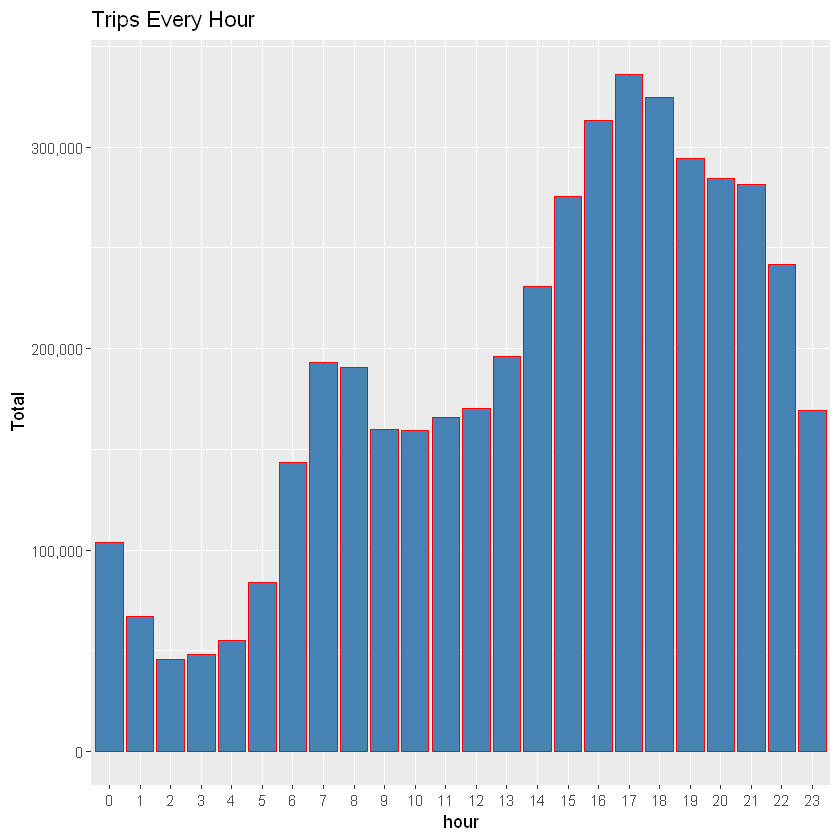

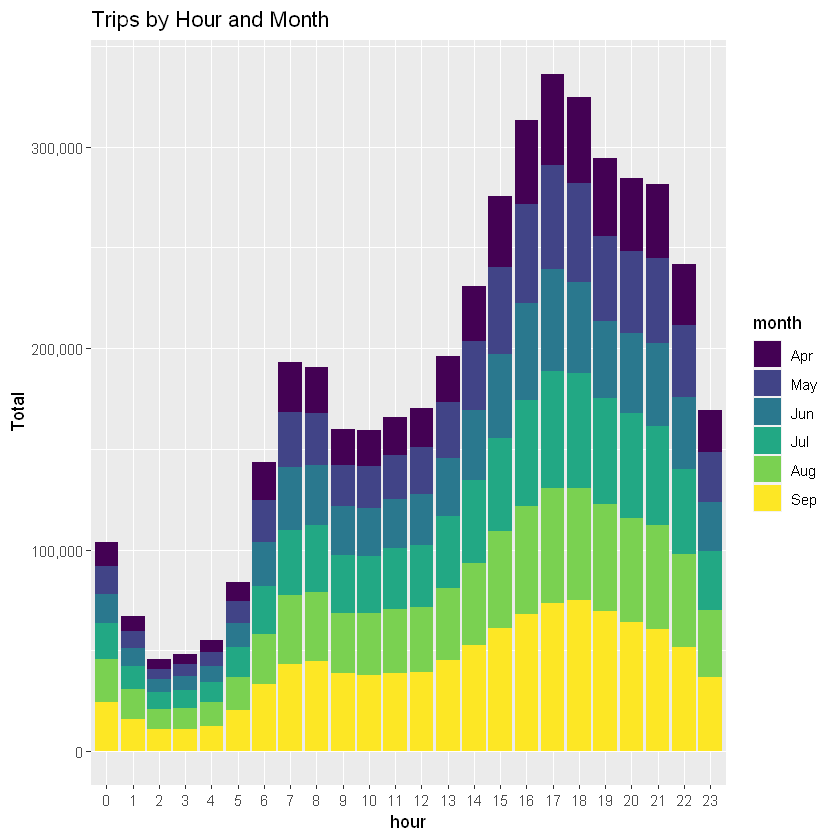

In [7]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())

ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


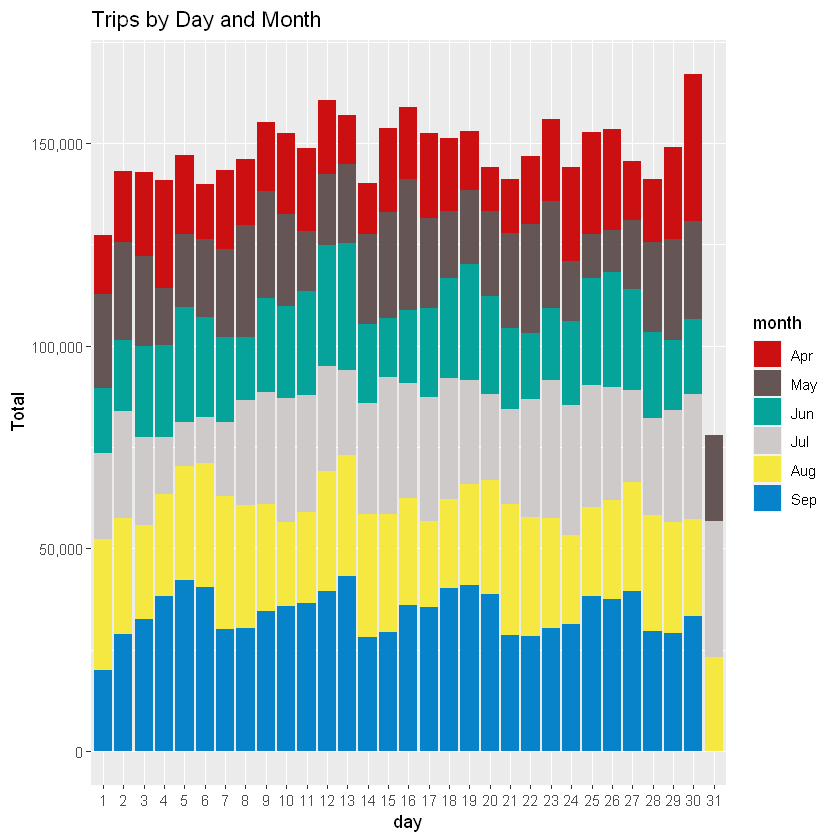

In [8]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())

ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

In [9]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 

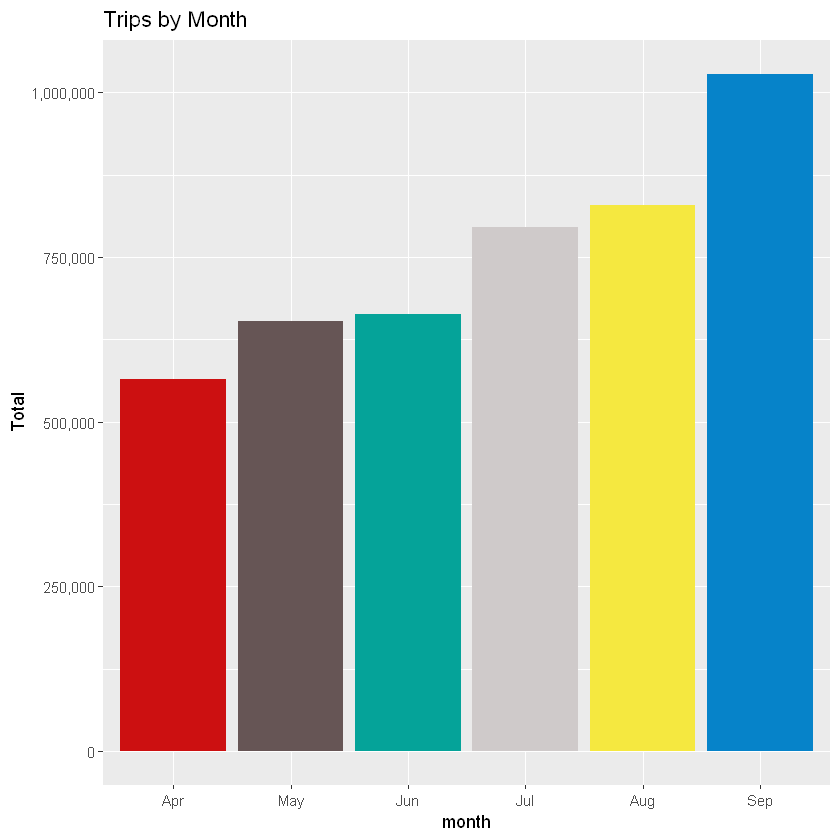

In [10]:
ggplot(month_group, aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)